## 1. Imports and Basic Configuration

In [1]:
import sys
sys.path.append("..") # Eliminating the invisibility of src.dataloader 
import torch
import numpy as np
import matplotlib.pyplot as plt
from src.dataloader import get_mnist_loaders

# Basic checking
print(f"PyTroch vesrion: {torch.__version__}")

PyTroch vesrion: 2.9.0+cpu


## 2. Exploratory Data Analysis

In [2]:
# loading dataloaders
train_loader, test_loader = get_mnist_loaders()

In [3]:
print(f"Dataset information:")
# Looking at the number of examples
num_train = len(train_loader.dataset)
num_test = len(test_loader.dataset)
print(f"  Train size: {num_train}\n  Test size:  {num_test}")

# Looking at the batch shape, type, and range of values
images, labels = next(iter(train_loader))
print(f"\n  Images:\n    shape: {images.shape}\n    type: {images.type}\n    Min value: {images.min()}\n    Max value: {images.max()}")
print(f"\n  Labels:\n    shape: {labels.shape}\n    type: {labels.type}\n    Min value: {labels.min()}\n    Max value: {labels.max()}")

Dataset information:
  Train size: 60000
  Test size:  10000

  Images:
    shape: torch.Size([64, 1, 28, 28])
    type: <built-in method type of Tensor object at 0x790a895123a0>
    Min value: 0.0
    Max value: 1.0

  Labels:
    shape: torch.Size([64])
    type: <built-in method type of Tensor object at 0x790a89512440>
    Min value: 0
    Max value: 9


In [4]:
# Missing values analis
has_nan_images = torch.isnan(images).any() # the zero-dimensional tensor returns
has_nan_labels = torch.isnan(labels).any()
# print(type(has_nan_images))
print(f"Missing in images: {has_nan_images}")
print(f"Missing in labels: {has_nan_labels}")

Missing in images: False
Missing in labels: False


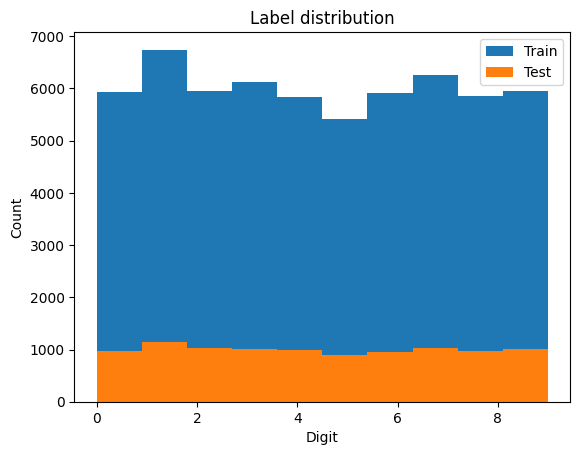

In [5]:
# Distribution graphs
train_labels = np.array([lbl.item() for _, lbls in train_loader for lbl in lbls])
test_labels = np.array([lbl.item() for _, lbls in test_loader for lbl in lbls])
plt.hist(train_labels, bins=10, label="Train")
plt.hist(test_labels, bins=10, label="Test")
plt.legend()
plt.title("Label distribution")
plt.xlabel("Digit")
plt.ylabel("Count")
plt.show()

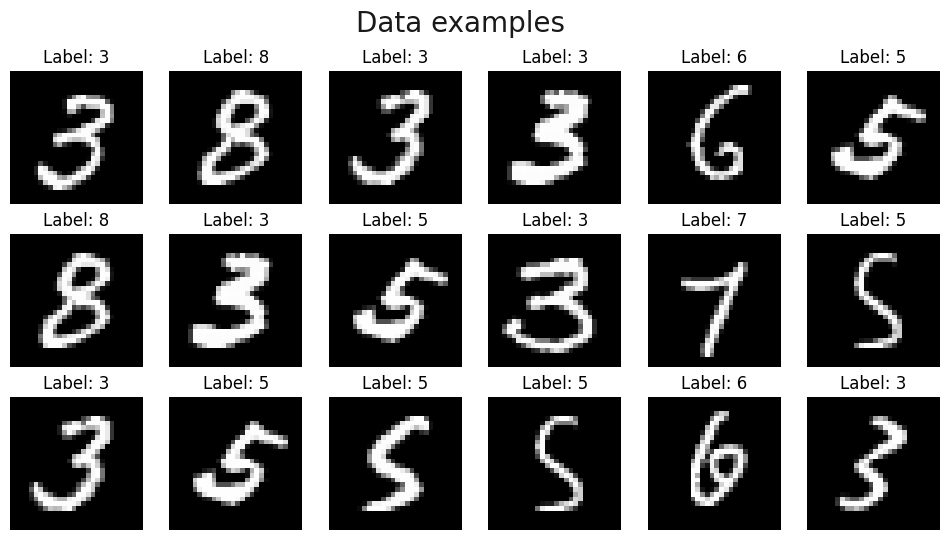

In [6]:
# Several handwritten numbers
fig, axes = plt.subplots(3, 6, figsize=(12,6))
for i in range(3):
    for j in range(6):
        idx = (i + 1) * (j + 1) # just non-repeating numbers
        axes[i, j].imshow(images[idx][0], cmap="gray")
        axes[i, j].set_title(f"Label: {labels[idx]}")
        axes[i, j].axis("off")

plt.suptitle("Data examples", fontsize=20, alpha=0.9)
plt.show()

## 3. Conclusions

- The training dataset contains 60,000 examples, the test dataset contains 10,000.
- The features are distributed in the range [0.0, 1.0].
- Omissions and empty elements are missing.
- The data is distributed almost evenly.
- All images are 28x28 in size, with one channel (grayscale).
- The readability is good, the quality is suitable for classification.